# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
speech = pd.read_csv('/content/drive/My Drive/MLtutoring/Final/pd_speech_features_modified.csv')

In [ ]:
speech['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [ ]:
df = speech.copy()

In [ ]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.265120,0.083127,...,0.071728,0.010352,-2.730300,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.220040,0.127410,...,0.729330,0.780410,5.229400,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.157560,0.116890,...,0.269510,-0.005522,0.350540,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.172950,0.147370,...,0.366920,-0.492650,0.191640,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4

# Scaling

### Scaling에는 2가지 방법
- Normalization (min-max scaling / 0~1)
- Standardization (mean/std)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
mms = MinMaxScaler()
sds = StandardScaler()

# 10 fold

In [ ]:
# StratifiedKFold guerantees uniform proportion of target values for each fold
from sklearn.model_selection import StratifiedKFold

RS = 1234
# shuffle: random shuffle data, random_state: key of random shuffle
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RS)

In [ ]:
target_col = 'class'
unused_cols = ['id']

In [ ]:
X = df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
y = df[target_col].values

In [ ]:
ids = df.loc[::3, 'id'].values
classes = df.loc[::3, 'class'].values

In [ ]:
ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
model = DecisionTreeClassifier(random_state=RS)

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    print(train_indice, test_indice)

In [ ]:
ids[train_indice]

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  26,  27,
        28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,
        97,  98,  99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 115, 116, 117, 119, 120, 121, 122, 123, 124, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 148, 149, 150, 151, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 170, 171,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 189, 190, 191, 192, 193, 195, 198, 199, 200, 20

# Baseline Models

In [ ]:
from sklearn.metrics import roc_auc_score  # for printing score

## Decision tree(0.6565)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=RS)

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_train = train_df[target_col].values
    X_test = test_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_test = test_df[target_col].values
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))

[Fold 0] AUC : 0.6228070175438596
[Fold 1] AUC : 0.6027568922305764
[Fold 2] AUC : 0.5862573099415205
[Fold 3] AUC : 0.682748538011696
[Fold 4] AUC : 0.6257309941520467
[Fold 5] AUC : 0.605263157894737
[Fold 6] AUC : 0.8099415204678363
[Fold 7] AUC : 0.5994152046783625
[Fold 8] AUC : 0.7592592592592593
[Fold 9] AUC : 0.6706349206349207
Mean AUC : 0.6564814814814814


## Random Forest(0.7239)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=RS)

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_train = train_df[target_col].values
    X_test = test_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_test = test_df[target_col].values
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))    

[Fold 0] AUC : 0.6578947368421053
[Fold 1] AUC : 0.5664160401002507
[Fold 2] AUC : 0.7222222222222222
[Fold 3] AUC : 0.7529239766081872
[Fold 4] AUC : 0.685672514619883
[Fold 5] AUC : 0.6125730994152045
[Fold 6] AUC : 0.8523391812865496
[Fold 7] AUC : 0.8157894736842106
[Fold 8] AUC : 0.7579365079365078
[Fold 9] AUC : 0.8148148148148149
Mean AUC : 0.7238582567529936


## KNN(mms: 0.6650)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Choose one scaler from below
trs = mms
# trs = sds
model = KNeighborsClassifier()
# 주변에서 가까운 것 선택하는 거라 랜덤성을 부여할 수 없다. 
aucs = []



for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_train = train_df[target_col].values
    X_test = test_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_test = test_df[target_col].values

    # Use these to apply scaling
    X_train_scaled = trs.fit_transform(X_train)
    X_test_scaled = trs.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))  

[Fold 0] AUC : 0.605263157894737
[Fold 1] AUC : 0.5576441102756893
[Fold 2] AUC : 0.7324561403508771
[Fold 3] AUC : 0.6198830409356725
[Fold 4] AUC : 0.6403508771929824
[Fold 5] AUC : 0.6125730994152045
[Fold 6] AUC : 0.77046783625731
[Fold 7] AUC : 0.6403508771929824
[Fold 8] AUC : 0.6600529100529101
[Fold 9] AUC : 0.816137566137566
Mean AUC : 0.6655179615705931


## svm (mms: 0.7108)

In [ ]:
import sklearn.svm as svm

In [ ]:
# Choose one scaler from below
trs = mms
# trs = sds

model = svm.SVC(kernel='rbf', random_state=RS)

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_train = train_df[target_col].values
    X_test = test_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_test = test_df[target_col].values

    # Use these to apply scaling
    X_train_scaled = trs.fit_transform(X_train)
    X_test_scaled = trs.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))    

[Fold 0] AUC : 0.6015037593984962
[Fold 1] AUC : 0.7117794486215538
[Fold 2] AUC : 0.6944444444444444
[Fold 3] AUC : 0.7426900584795322
[Fold 4] AUC : 0.6769005847953216
[Fold 5] AUC : 0.6125730994152045
[Fold 6] AUC : 0.7792397660818714
[Fold 7] AUC : 0.7690058479532164
[Fold 8] AUC : 0.7195767195767195
[Fold 9] AUC : 0.8002645502645502
Mean AUC : 0.7107978279030911


## XGBoost(0.7011)

In [ ]:
from xgboost import XGBRFClassifier

In [ ]:
model = XGBRFClassifier(random_state=RS)

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_train = train_df[target_col].values
    X_test = test_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_test = test_df[target_col].values
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))    

[Fold 0] AUC : 0.6015037593984962
[Fold 1] AUC : 0.6140350877192983
[Fold 2] AUC : 0.7134502923976608
[Fold 3] AUC : 0.7339181286549707
[Fold 4] AUC : 0.6769005847953216
[Fold 5] AUC : 0.6403508771929824
[Fold 6] AUC : 0.9078947368421053
[Fold 7] AUC : 0.6695906432748537
[Fold 8] AUC : 0.7341269841269842
[Fold 9] AUC : 0.7195767195767195
Mean AUC : 0.7011347813979393


# Hyperparameter Tuning
BorutaShap: https://pypi.org/project/BorutaShap/

In [ ]:
from sklearn.metrics import roc_auc_score  # for printing score
RS = 1234

## Decision tree(0.6948)

### Shap
Shap은 그냥 피쳐 중요도 보는거라 10fold까지 할 필요는 없다. 다만 같은 id가 train과 test셋 모두에 들어가게 하는 것만 방지해주자.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
RS = 1234

train, test = train_test_split(range(252),
                               stratify=df[['id', 'class']].drop_duplicates()['class'].tolist(),
                               random_state=RS,
                               test_size=0.2) # train:test = 8:2

In [ ]:
df_train = df[df['id'].isin(train)]
df_test = df[df['id'].isin(test)]

In [ ]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]

In [ ]:
model = DecisionTreeClassifier(random_state=RS)

model.fit(X_train, y_train)
model.score(X_test, y_test) # accuracy일거다

0.7254901960784313

In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 8.0MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463915 sha256=351c028e972ec8ace792ba93ee15c40f413642694a40edf7c48ed2ac3e1adf01
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


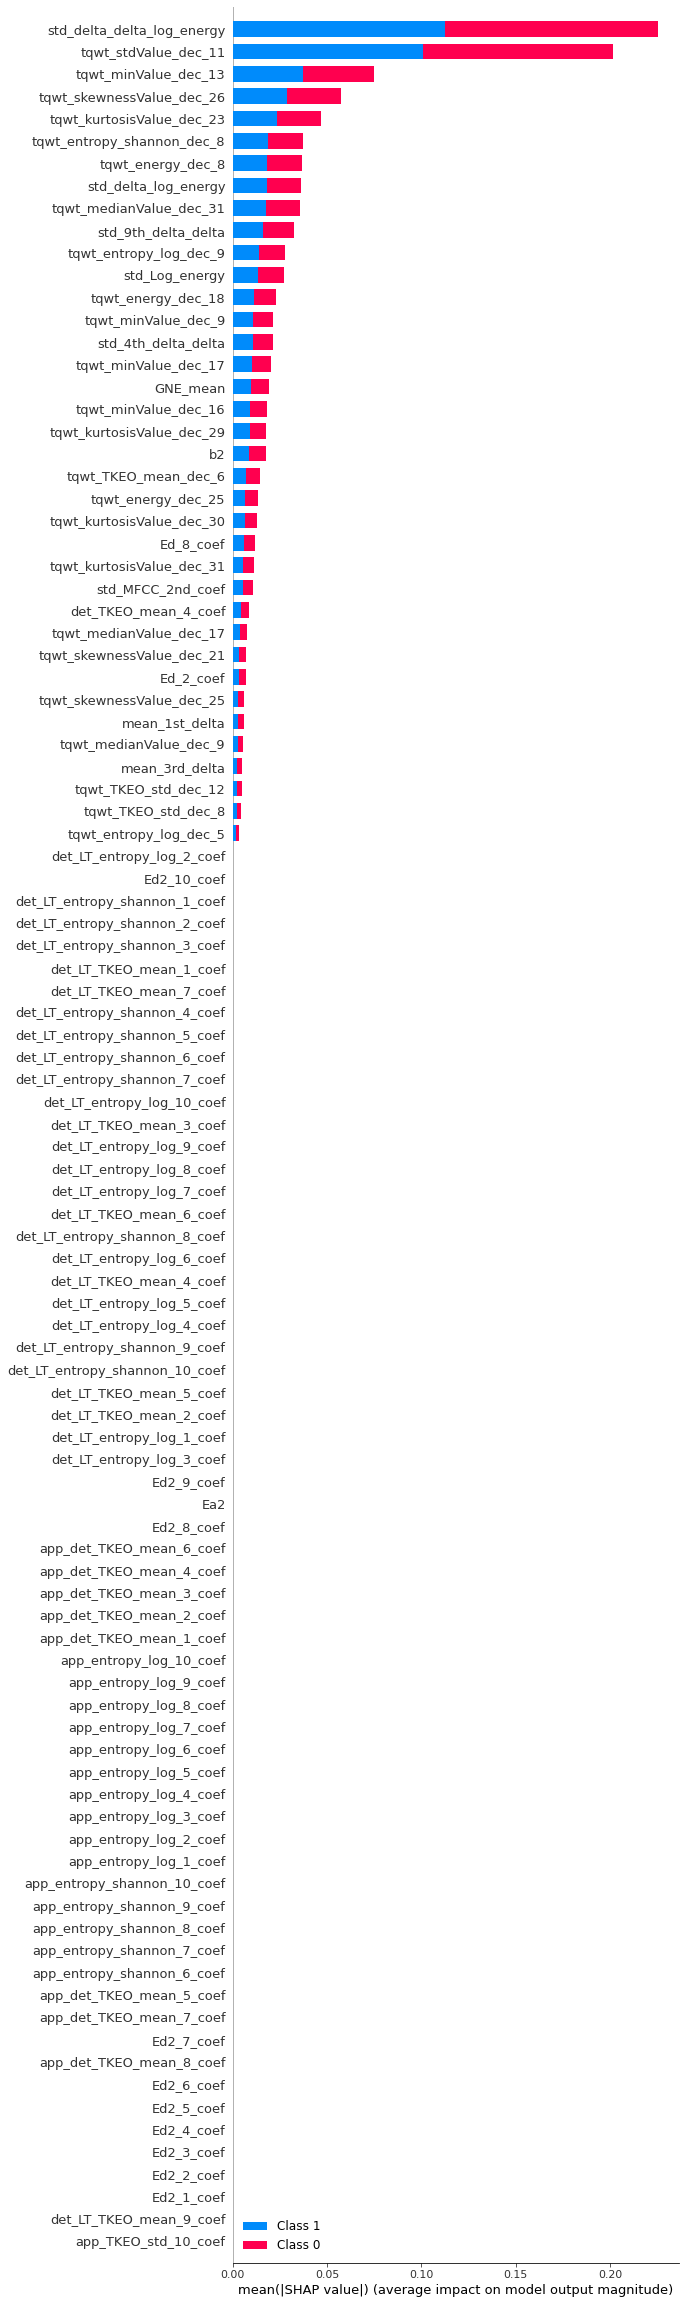

In [ ]:
import shap
import skimage

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=100)

In [ ]:
# https://github.com/slundberg/shap/issues/632
vals= np.abs(shap_values[1]).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance.head()

,col_name,feature_importance_vals
125,std_delta_delta_log_energy,0.112626
583,tqwt_stdValue_dec_11,0.100684
621,tqwt_minValue_dec_13,0.037526
706,tqwt_skewnessValue_dec_26,0.028847
739,tqwt_kurtosisValue_dec_23,0.023333


In [ ]:
important_features = feature_importance['col_name'].tolist()

In [ ]:
important_features.index('tqwt_entropy_log_dec_5')

36

In [ ]:
most_important_features = important_features[:37]

### 다음과정

#### 함수 빌드

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
#Find the most accurate value of k of max_depth
def max_depth(k):
  score = 0
  scroe_k = 0
  k_value = 0
  for i in range(1,k+1,1):
    globals()['max_depth_classifier_{}'.format(i+1)] = DecisionTreeClassifier(max_depth=i)
    globals()['max_depth_classifier_{}'.format(i+1)].fit(X_train, y_train)
    score_k = globals()['max_depth_classifier_{}'.format(i+1)].score(X_test, y_test)
    if score_k >= score:
      score = score_k
      k_value = i
  return k_value
best_max_depth = max_depth(100)

In [ ]:
#Find the most accurate value of k in max_leaf_nodes
def max_leaf_nodes(k):
    score = 0
    scroe_k = 0
    k_value = 0
    for i in range(2,k+1,1):
        globals()['max_leaf_classifier_{}'.format(i+1)] = DecisionTreeClassifier(max_leaf_nodes=i)
        globals()['max_leaf_classifier_{}'.format(i+1)].fit(X_train, y_train)
        score_k = globals()['max_depth_classifier_{}'.format(i+1)].score(X_test, y_test)
        if score_k >= score:
            score = score_k
            k_value = i
    return k_value
best_max_leaf_nodes = max_leaf_nodes(100)

In [ ]:
#Find the most accurate value of k in min_samples_split
def min_samples_split(k):
  score = 0
  scroe_k = 0
  k_value = 0
  for i in range(2,k+1,1):
    globals()['min_samples_split_classifier_{}'.format(i+1)] = DecisionTreeClassifier(min_samples_split=i)
    globals()['min_samples_split_classifier_{}'.format(i+1)].fit(X_train, y_train)
    score_k = globals()['min_samples_split_classifier_{}'.format(i+1)].score(X_test, y_test)
    if score_k >= score:
      score = score_k
      k_value = i
  return k_value
best_min_samples_split = min_samples_split(1000)

In [ ]:
#Find the most accurate value of k in min_impurity_decrease
def min_impurity_decrease(k):
  score = 0
  scroe_k = 0
  k_value = 0
  for i in np.arange(0,k,0.001):
    globals()['min_impurity_decrease_classifier_{}'.format(i+1)] = DecisionTreeClassifier(min_impurity_decrease=i)
    globals()['min_impurity_decrease_classifier_{}'.format(i+1)].fit(X_train, y_train)
    score_k = globals()['min_impurity_decrease_classifier_{}'.format(i+1)].score(X_test, y_test)
    if score_k >= score:
      score = score_k
      k_value = i
  return k_value
best_min_impurity_decrease = min_impurity_decrease(1)

In [ ]:
#Find the most accurate value of k in min_samples_leaf
def min_samples_leaf(k):
  score = 0
  scroe_k = 0
  k_value = 0
  for i in range(2,k+1,1):
    globals()['min_samples_leaf_classifier_{}'.format(i+1)] = DecisionTreeClassifier(min_samples_leaf=i)
    globals()['min_samples_leaf_classifier_{}'.format(i+1)].fit(X_train, y_train)
    score_k = globals()['min_samples_leaf_classifier_{}'.format(i+1)].score(X_test, y_test)
    if score_k >= score:
      score = score_k
      k_value = i
  return k_value
best_min_samples_leaf = min_samples_leaf(1000)

In [ ]:
def best_decision_model(x, y, X_test, y_test, best_max_depth, best_max_leaf_nodes, best_min_samples_split, best_min_impurity_decrease, best_min_samples_leaf):
  score = np.zeros(5)
  max = 0
  max_score_model = 0
  classifier_0 = DecisionTreeClassifier(max_depth = best_max_depth)
  classifier_0.fit(X_train, y_train)
  score[0] = np.mean(cross_val_score(classifier_0, x, y, scoring = 'roc_auc', cv = 10))
  classifier_1 = DecisionTreeClassifier(max_leaf_nodes = best_max_leaf_nodes)
  classifier_1.fit(X_train, y_train)
  score[1] = np.mean(cross_val_score(classifier_1, x, y, scoring = 'roc_auc', cv = 10))
  classifier_2 = DecisionTreeClassifier(min_samples_split = best_min_samples_split)
  classifier_2.fit(X_train, y_train)
  score[2] = np.mean(cross_val_score(classifier_2, x, y, scoring = 'roc_auc', cv = 10))
  classifier_3 = DecisionTreeClassifier(min_impurity_decrease = best_min_impurity_decrease)
  classifier_3.fit(X_train, y_train)
  score[3] = np.mean(cross_val_score(classifier_3, x, y, scoring = 'roc_auc', cv = 10))
  classifier_4 = DecisionTreeClassifier(min_samples_leaf = best_min_samples_leaf)
  classifier_4.fit(X_train, y_train)
  score[4] = np.mean(cross_val_score(classifier_4, x, y, scoring = 'roc_auc', cv = 10))
  for i in range(0,4,1):
    if max <= score[i]:
      max = score[i]
      max_score_model = i
  if max_score_model == 0:
    return classifier_0
  if max_score_model == 1:
    return classifier_1
  if max_score_model == 2:
    return classifier_2
  if max_score_model == 3:
    return classifier_3
  if max_score_model == 4:
    return classifier_4

#### 함수 적용

In [ ]:
drop_first_dt = best_decision_model(X_train, y_train, X_test, y_test, best_max_depth, best_max_leaf_nodes, best_min_samples_split, best_min_impurity_decrease, best_min_samples_leaf)
drop_first_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 하이퍼파라미터 & 피쳐 적용

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# StratifiedKFold guerantees uniform proportion of target values for each fold
from sklearn.model_selection import StratifiedKFold

RS = 1234
# shuffle: random shuffle data, random_state: key of random shuffle
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RS)

target_col = 'class'
unused_cols = ['id']

X = df[most_important_features].values
y = df[target_col].values

ids = df.loc[::3, 'id'].values
classes = df.loc[::3, 'class'].values

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=RS, splitter='best')

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[most_important_features].values
    y_train = train_df[target_col].values
    X_test = test_df[most_important_features].values
    y_test = test_df[target_col].values
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))

[Fold 0] AUC : 0.5451127819548872
[Fold 1] AUC : 0.593984962406015
[Fold 2] AUC : 0.7339181286549707
[Fold 3] AUC : 0.7543859649122807
[Fold 4] AUC : 0.6973684210526316
[Fold 5] AUC : 0.6798245614035088
[Fold 6] AUC : 0.8903508771929824
[Fold 7] AUC : 0.6023391812865497
[Fold 8] AUC : 0.7063492063492063
[Fold 9] AUC : 0.7447089947089947
Mean AUC : 0.6948343079922028


## Random Forest(0.7456)

### Shap
Shap은 그냥 피쳐 중요도 보는거라 10fold까지 할 필요는 없다. 다만 같은 id가 train과 test셋 모두에 들어가게 하는 것만 방지해주자.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
RS = 1234

train, test = train_test_split(range(252),
                               stratify=df[['id', 'class']].drop_duplicates()['class'].tolist(),
                               random_state=RS,
                               test_size=0.2) # train:test = 8:2

In [ ]:
df_train = df[df['id'].isin(train)]
df_test = df[df['id'].isin(test)]

In [ ]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [ ]:
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]

In [ ]:
model = RandomForestClassifier(random_state=RS)

model.fit(X_train, y_train)
model.score(X_test, y_test) # accuracy일거다

0.8300653594771242

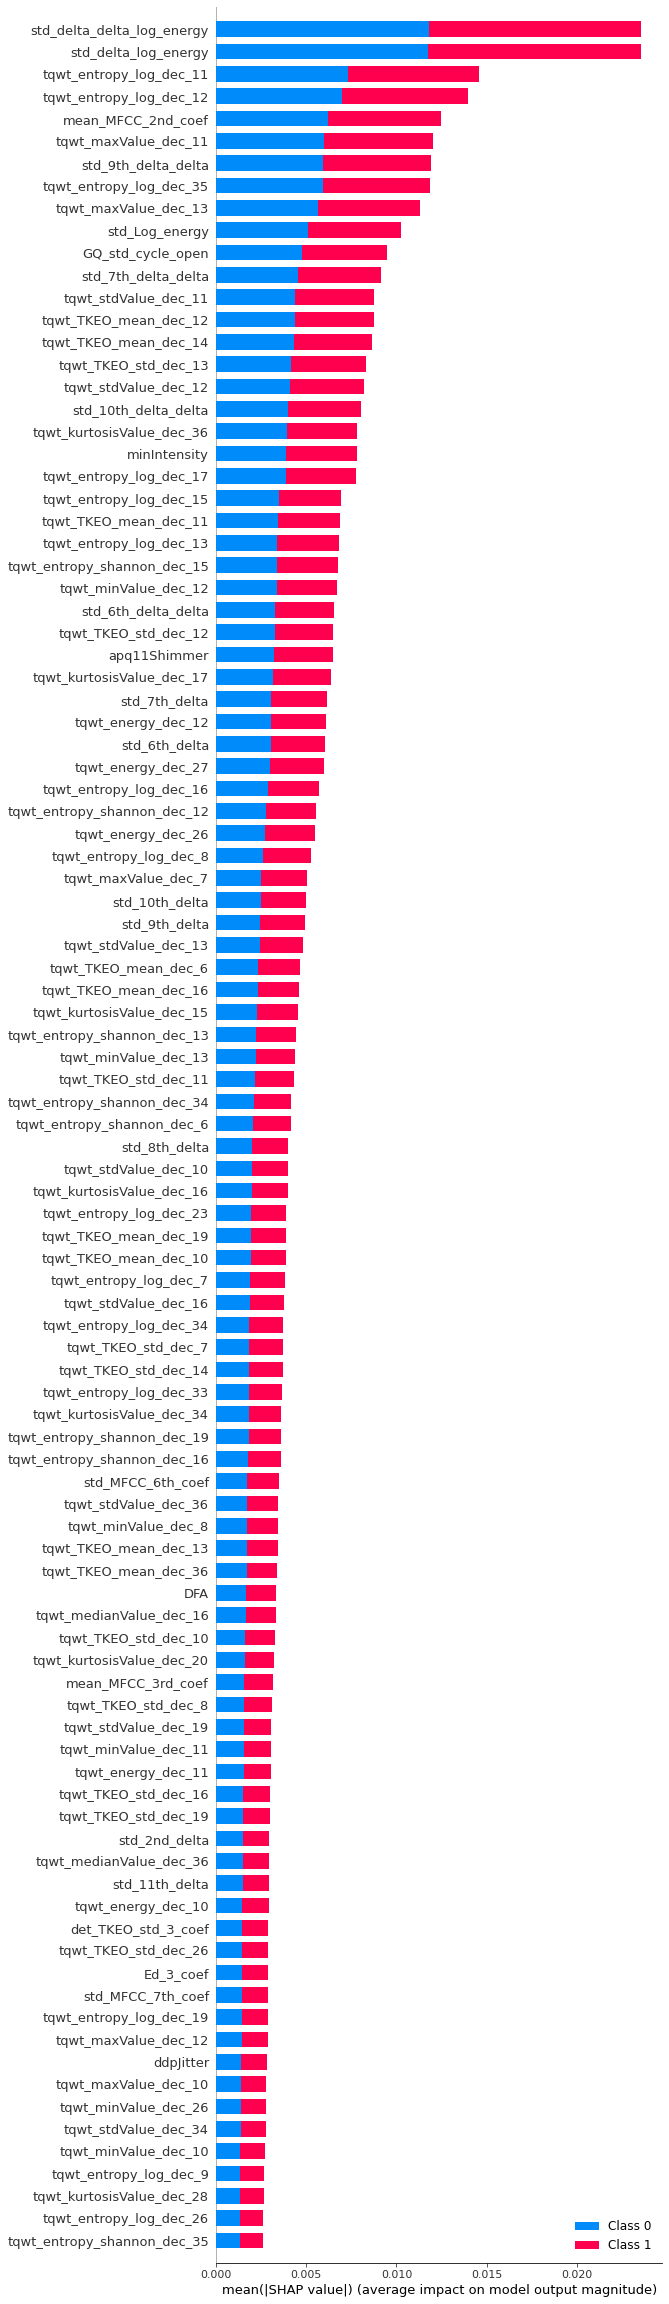

In [ ]:
import shap
import skimage

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=100)

In [ ]:
vals= np.abs(shap_values[1]).mean(0)

In [ ]:
vals

array([0.00000000e+00, 5.40571358e-04, 1.66782467e-03, 6.22501381e-04,
       3.71308141e-04, 6.88470477e-04, 5.13335382e-04, 5.87446629e-04,
       1.07908623e-03, 6.01980255e-04, 3.36871386e-04, 1.86587419e-04,
       1.40215650e-03, 2.25766269e-04, 1.56446577e-04, 1.35653005e-04,
       2.84702975e-04, 3.22829205e-03, 5.51935257e-04, 4.21940744e-04,
       9.83698557e-04, 7.82161831e-04, 3.90095348e-03, 7.15690675e-04,
       3.80107916e-04, 6.09741062e-04, 7.69133319e-04, 5.70786462e-04,
       6.26549566e-04, 6.03795802e-04, 5.06316740e-04, 4.08699637e-04,
       3.70959538e-04, 3.64296325e-04, 4.73872136e-03, 1.96442202e-04,
       7.36406509e-04, 6.40589970e-04, 3.67655116e-04, 4.21479144e-04,
       3.82058436e-04, 1.27289094e-03, 3.52305629e-04, 7.00214968e-04,
       2.37339070e-04, 1.06802613e-03, 2.60985284e-04, 2.47142949e-04,
       6.46518649e-04, 6.16514174e-04, 4.77728816e-04, 5.40190716e-04,
       5.59305505e-04, 5.73317642e-04, 5.94672586e-04, 9.33318052e-04,
      

In [ ]:
type(vals)

numpy.ndarray

In [ ]:
# https://github.com/slundberg/shap/issues/632
vals= np.abs(shap_values[1]).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance.head()

,col_name,feature_importance_vals
125,std_delta_delta_log_energy,0.011785
111,std_delta_log_energy,0.011772
403,tqwt_entropy_log_dec_11,0.007292
404,tqwt_entropy_log_dec_12,0.006982
58,mean_MFCC_2nd_coef,0.006231


In [ ]:
important_features = feature_importance['col_name'].tolist()

In [ ]:
most_important_features = important_features[:100]

### GridSearch
Gridsearch의 cv는 내장함수이므로 id 중복 없이 cv가 가능하도록 임의조정이 불가능하다. 어쩔 수 없이 id기준으로 중복된 걸 제거한다.

In [ ]:
df_mini = df.drop_duplicates(subset=['id'])
df_mini = df_mini.drop(columns=['id'])
X = df_mini.iloc[:, :-1]
y = df_mini.iloc[:, -1]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=RS)

param_grid = {'n_estimators' :[1,5,10,50,100,200],
    'max_depth' : [2,3,4,5,6,8,10,12],
    'min_samples_leaf' : [2,3,4,5,6,7,8,10],
    'min_samples_split' : [2,3,5,6,7,8,9,10]
}

gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='roc_auc',
                  cv=10, # 내장함수이므로 id를 중복되지 않게 나눌 길이 없다
                  n_jobs=-1)

In [ ]:
gs = gs.fit(X[most_important_features], y)
print(gs.best_score_)
print(gs.best_params_)

0.8571010860484545
{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


### Implication to the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# StratifiedKFold guerantees uniform proportion of target values for each fold
from sklearn.model_selection import StratifiedKFold

RS = 1234
# shuffle: random shuffle data, random_state: key of random shuffle
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RS)

target_col = 'class'
unused_cols = ['id']

X = df[most_important_features].values
y = df[target_col].values

ids = df.loc[::3, 'id'].values
classes = df.loc[::3, 'class'].values

In [ ]:
model = RandomForestClassifier(random_state=RS, max_depth=12,
                               min_samples_leaf=2, min_samples_split=5,
                               n_estimators=200)

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[most_important_features].values
    y_train = train_df[target_col].values
    X_test = test_df[most_important_features].values
    y_test = test_df[target_col].values
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))     

[Fold 0] AUC : 0.6666666666666667
[Fold 1] AUC : 0.6854636591478698
[Fold 2] AUC : 0.75
[Fold 3] AUC : 0.7982456140350878
[Fold 4] AUC : 0.6959064327485379
[Fold 5] AUC : 0.6038011695906433
[Fold 6] AUC : 0.9166666666666667
[Fold 7] AUC : 0.7426900584795322
[Fold 8] AUC : 0.7910052910052909
[Fold 9] AUC : 0.8055555555555556
Mean AUC : 0.7456001113895852


## KNN(mms: 0.6655)
Shap 라이브러리가 KNN을 인식하지 못하므로 SHAP은 생략.

### GridSearch
Gridsearch의 cv는 내장함수이므로 id 중복 없이 cv가 가능하도록 임의조정이 불가능하다. 어쩔 수 없이 id기준으로 중복된 걸 제거한다.

In [ ]:
df_mini = df.drop_duplicates(subset=['id'])
df_mini = df_mini.drop(columns=['id'])
X = df_mini.iloc[:, :-1]
y = df_mini.iloc[:, -1]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = KNeighborsClassifier()

param_grid = {'n_neighbors' :[3, 4, 5, 6, 7],
    'leaf_size' : [20, 30, 40, 50],
}

gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='roc_auc',
                  cv=10, # 내장함수이므로 id를 중복되지 않게 나눌 길이 없다
                  n_jobs=-1)

In [ ]:
gs = gs.fit(X[most_important_features], y)
print(gs.best_score_)
print(gs.best_params_)

0.7255847953216374
{'leaf_size': 20, 'n_neighbors': 5}


### Implication to the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# StratifiedKFold guerantees uniform proportion of target values for each fold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

RS = 1234
# shuffle: random shuffle data, random_state: key of random shuffle
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RS)

target_col = 'class'
unused_cols = ['id']

X = df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
y = df[target_col].values

ids = df.loc[::3, 'id'].values
classes = df.loc[::3, 'class'].values

In [ ]:
mms = MinMaxScaler()
trs = mms

model = KNeighborsClassifier(leaf_size=20, n_neighbors=5)

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_train = train_df[target_col].values
    X_test = test_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_test = test_df[target_col].values

    # Use these to apply scaling
    X_train_scaled = trs.fit_transform(X_train)
    X_test_scaled = trs.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))  

[Fold 0] AUC : 0.605263157894737
[Fold 1] AUC : 0.5576441102756893
[Fold 2] AUC : 0.7324561403508771
[Fold 3] AUC : 0.6198830409356725
[Fold 4] AUC : 0.6403508771929824
[Fold 5] AUC : 0.6125730994152045
[Fold 6] AUC : 0.77046783625731
[Fold 7] AUC : 0.6403508771929824
[Fold 8] AUC : 0.6600529100529101
[Fold 9] AUC : 0.816137566137566
Mean AUC : 0.6655179615705931


## svm (mms: 0.7108)

### GridSearch
Gridsearch의 cv는 내장함수이므로 id 중복 없이 cv가 가능하도록 임의조정이 불가능하다. 어쩔 수 없이 id기준으로 중복된 걸 제거한다.

In [ ]:
df_mini = df.drop_duplicates(subset=['id'])
df_mini = df_mini.drop(columns=['id'])
X = df_mini.iloc[:, :-1]
y = df_mini.iloc[:, -1]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = svm.SVC(kernel='rbf', random_state=RS)

param_grid = {'gamma':['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'break_ties':[True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='roc_auc',
                  cv=10, # 내장함수이므로 id를 중복되지 않게 나눌 길이 없다
                  n_jobs=-1)

In [ ]:
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.6495822890559733
{'break_ties': True, 'gamma': 'scale'}


### Implication to the model

In [ ]:
# StratifiedKFold guerantees uniform proportion of target values for each fold
from sklearn.model_selection import StratifiedKFold

RS = 1234
# shuffle: random shuffle data, random_state: key of random shuffle
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RS)

In [ ]:
target_col = 'class'
unused_cols = ['id']

In [ ]:
X = df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
y = df[target_col].values

In [ ]:
ids = df.loc[::3, 'id'].values
classes = df.loc[::3, 'class'].values

In [ ]:
# Choose one scaler from below
trs = mms
# trs = sds

model = svm.SVC(kernel='rbf', random_state=RS,
                # C=0.01,
                gamma='scale', break_ties=True
                )

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_train = train_df[target_col].values
    X_test = test_df[[col for col in df.columns if col not in unused_cols + [target_col]]].values
    y_test = test_df[target_col].values

    # Use these to apply scaling
    X_train_scaled = trs.fit_transform(X_train)
    X_test_scaled = trs.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))    

[Fold 0] AUC : 0.6015037593984962
[Fold 1] AUC : 0.7117794486215538
[Fold 2] AUC : 0.6944444444444444
[Fold 3] AUC : 0.7426900584795322
[Fold 4] AUC : 0.6769005847953216
[Fold 5] AUC : 0.6125730994152045
[Fold 6] AUC : 0.7792397660818714
[Fold 7] AUC : 0.7690058479532164
[Fold 8] AUC : 0.7195767195767195
[Fold 9] AUC : 0.8002645502645502
Mean AUC : 0.7107978279030911


## XGBoost(0.7104)

### BorutaShap 구축

In [ ]:
!pip install BorutaShap

In [ ]:
from BorutaShap import BorutaShap
from xgboost import XGBClassifier

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
df_mini = df.drop_duplicates(subset=['id'])
df_mini = df_mini.drop(columns=['id'])
X = df_mini.iloc[:, :-1]
y = df_mini.iloc[:, -1]

In [ ]:
RS = 1234

model = XGBClassifier(random_state=RS)

# if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y,
                     n_trials=100, sample=False,
                     train_or_test = 'test', normalize=True,
                     verbose=True)

100%|██████████| 100/100 [00:52<00:00,  1.91it/s]

4 attributes confirmed important: ['tqwt_kurtosisValue_dec_15', 'std_delta_delta_log_energy', 'tqwt_TKEO_std_dec_13', 'std_8th_delta']
749 attributes confirmed unimportant: ['ppq5Jitter', 'std_11th_delta_delta', 'app_LT_TKEO_mean_7_coef', 'ddpJitter', 'tqwt_kurtosisValue_dec_8', 'tqwt_kurtosisValue_dec_22', 'tqwt_kurtosisValue_dec_27', 'GNE_NSR_TKEO', 'app_det_TKEO_mean_8_coef', 'Ed_7_coef', 'tqwt_maxValue_dec_30', 'det_LT_entropy_log_3_coef', 'mean_5th_delta_delta', 'gender', 'det_entropy_shannon_1_coef', 'tqwt_TKEO_mean_dec_2', 'tqwt_maxValue_dec_24', 'det_LT_TKEO_std_6_coef', 'det_entropy_log_3_coef', 'app_LT_entropy_shannon_2_coef', 'det_entropy_shannon_7_coef', 'tqwt_stdValue_dec_1', 'mean_MFCC_9th_coef', 'std_MFCC_0th_coef', 'meanNoiseToHarmHarmonicity', 'tqwt_entropy_shannon_dec_6', 'tqwt_entropy_shannon_dec_28', 'det_LT_entropy_log_7_coef', 'det_entropy_log_10_coef', 'tqwt_kurtosisValue_dec_32', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_shannon_dec_11', 'tqwt_TKEO_mean_dec_3

In [ ]:
most_important_features = ['tqwt_kurtosisValue_dec_15', 'std_delta_delta_log_energy', 'tqwt_TKEO_std_dec_13', 'std_8th_delta']

### GridSearch
Gridsearch의 cv는 내장함수이므로 id 중복 없이 cv가 가능하도록 임의조정이 불가능하다. 어쩔 수 없이 id기준으로 중복된 걸 제거한다.

In [ ]:
df_mini = df.drop_duplicates(subset=['id'])
df_mini = df_mini.drop(columns=['id'])
X = df_mini.iloc[:, :-1]
y = df_mini.iloc[:, -1]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = XGBRFClassifier(random_state=RS)

param_grid = {'n_estimators' : [1,10,20,50,100,200],
                  'learning_rate' : [0.01,0.02,0.03,0.05,0.1,0.15,0.2],
                  'max_depth' : [2,3,4,5,6,7,8]}

gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  scoring='roc_auc',
                  cv=10, # 내장함수이므로 id를 중복되지 않게 나눌 길이 없다
                  n_jobs=-1)

In [ ]:
gs = gs.fit(X[most_important_features], y)
print(gs.best_score_)
print(gs.best_params_)

0.8342731829573935
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}


### Implication to the model

In [ ]:
# StratifiedKFold guerantees uniform proportion of target values for each fold
from sklearn.model_selection import StratifiedKFold

RS = 1234
# shuffle: random shuffle data, random_state: key of random shuffle
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RS)

In [ ]:
target_col = 'class'
unused_cols = ['id']

In [ ]:
X = df[most_important_features].values
y = df[target_col].values

In [ ]:
ids = df.loc[::3, 'id'].values
classes = df.loc[::3, 'class'].values

In [ ]:
model = XGBRFClassifier(random_state=RS, learning_rate=0.01,
                        max_depth=6, n_estimators=100)

aucs = []

for fold, (train_indice, test_indice) in enumerate(kfold.split(ids, classes)):
    train_df = df[df['id'].isin(ids[train_indice])]
    test_df = df[df['id'].isin(ids[test_indice])]
    
    X_train = train_df[most_important_features].values
    y_train = train_df[target_col].values
    X_test = test_df[most_important_features].values
    y_test = test_df[target_col].values
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    aucs.append(auc)
    print("[Fold {}] AUC : {}".format(fold, aucs[fold]))

print('Mean AUC : {}'.format(np.mean(aucs)))    

[Fold 0] AUC : 0.6190476190476191
[Fold 1] AUC : 0.6140350877192983
[Fold 2] AUC : 0.7134502923976608
[Fold 3] AUC : 0.7339181286549707
[Fold 4] AUC : 0.6593567251461988
[Fold 5] AUC : 0.5935672514619883
[Fold 6] AUC : 0.9078947368421053
[Fold 7] AUC : 0.7251461988304094
[Fold 8] AUC : 0.7579365079365078
[Fold 9] AUC : 0.7433862433862434
Mean AUC : 0.7067738791423002
